### The lipinski Descriptor provides us a set of simple molecular descriptions which is essentially a oral drug like properties of the molecule, basically the global features of the molecule

### The pubChem fingerprints, generating form the Padel Descriptor, are describing the local features of the molecule.  Which is basically tells a chemical features present or not in the molecule

**So here we decide which functional group or fingerprints are essential for deciding a good drug or a potent drug**

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [3]:
df = pd.read_csv('final_dataset_for_model_building.csv')

In [4]:
df.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.869666
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.882397
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.008774
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.022276
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.950782


In [5]:
df.shape

(118, 882)

In [6]:
X = df[df.columns[:-1]]  #Input Features
Y = df[df.columns[-1]]   #Output

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Columns: 881 entries, PubchemFP0 to PubchemFP880
dtypes: int64(881)
memory usage: 812.3 KB


In [8]:
Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 118 entries, 0 to 117
Series name: pIC50
Non-Null Count  Dtype  
--------------  -----  
118 non-null    float64
dtypes: float64(1)
memory usage: 1.1 KB


In [9]:
X.shape

(118, 881)

**Remove low variance features**

In [10]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)   # Only features with a variance higher than 0.16 will be kept.

In [11]:
X.shape

(118, 197)

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [13]:
X_train.shape, Y_train.shape

((94, 197), (94,))

## **Building a Regression Model using Random Forest**

In [16]:
model = RandomForestRegressor(n_estimators=100,random_state=0, oob_score=True)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.5143286680926464

An R² score of 0.51 indicates that the model is able to explain a portion of the variance in the target variable, but there is still a significant amount of unexplained variance. This means the model has some predictive power but is not perfect.


The R² score measures the proportion of variance in the dependent variable that is predictable from the independent variables. It indicates the goodness-of-fit of the model.\
Range:\
0: The model does not explain any of the variance in the target variable.\
1: The model explains all of the variance in the target variable.\
Negative Values: If the R² score is negative, it indicates that the model performs worse than a simple mean-based model.

In [17]:
Y_pred = model.predict(X_test)

**Scatter Plot of Experimental vs Predicted pIC50 Values**

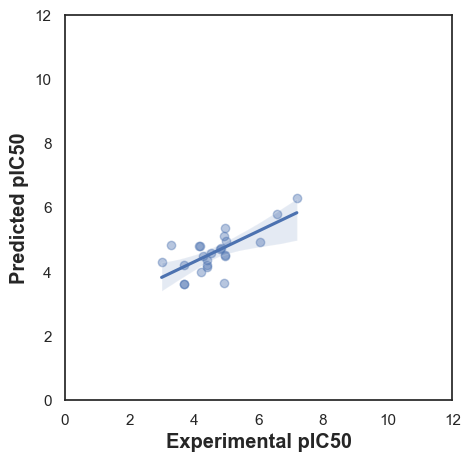

<function matplotlib.pyplot.show(close=None, block=None)>

In [18]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)

plt.show()


plt.show